We first import the required libraries:

In [1]:
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

Cocoa future price data is retrieved from the Yahoo Finance API:

In [2]:
Cocoa_yf = yf.Ticker('CC=F')
Cocoa_hist = Cocoa_yf.history(period='max')

We can make a plot of the historical price:

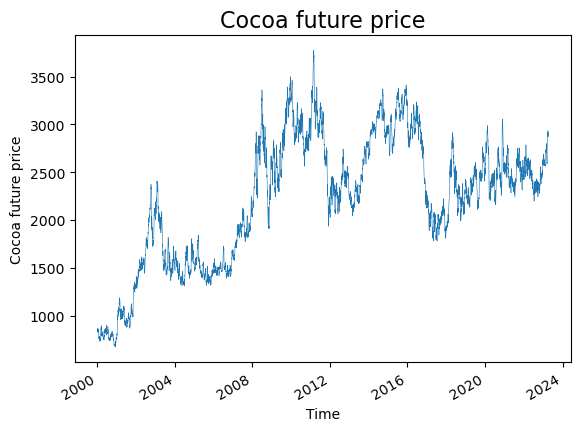

In [5]:
Cocoa_hist['Close'].plot(linewidth=0.4)
plt.title('Cocoa future price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Cocoa future price', fontsize=10)
plt.show()

The following function will perform the Dickey-Fuller stationarity test:

In [6]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

We can apply the Dickey-Fuller to the daily Cocoa future close price, which should be higher than 0,05 to accept the H0 hypothesis of non-stationarity:

In [7]:
test_stationarity(Cocoa_hist['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -2.652999
p-value                           0.082531
#Lags Used                       13.000000
Number of Observations Used    5820.000000
Critical Value (1%)              -3.431474
Critical Value (5%)              -2.862037
Critical Value (10%)             -2.567034
dtype: float64


The p-value above 0,05 shows that the series is non-stationarity. 

We can now **remove the heterodasticity** by applying the logarithm to the close price and test again to analyze the resulting p-value:

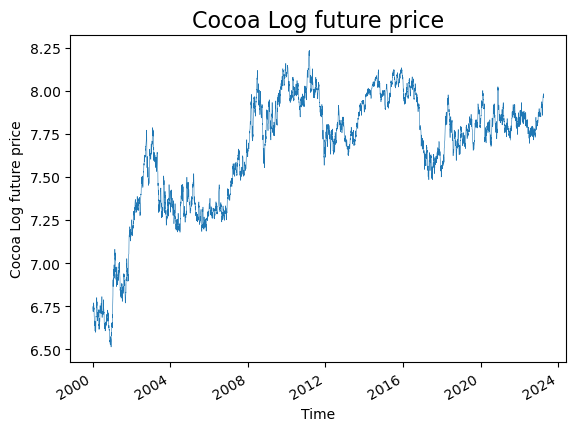

In [8]:
Cocoa_hist_log = np.log(Cocoa_hist.Close)
Cocoa_hist_log.plot(linewidth=0.4)
plt.title('Cocoa Log future price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Cocoa Log future price', fontsize=10)
plt.show()

In [9]:
test_stationarity(Cocoa_hist_log)

Results of Dickey-Fuller Test:
Test Statistic                   -2.777858
p-value                           0.061507
#Lags Used                        0.000000
Number of Observations Used    5833.000000
Critical Value (1%)              -3.431472
Critical Value (5%)              -2.862036
Critical Value (10%)             -2.567034
dtype: float64


The value is still above 0,05, meaning the time series is still non-stationary.

The next step is to **remove the trend** by removing the close price of the previous day:

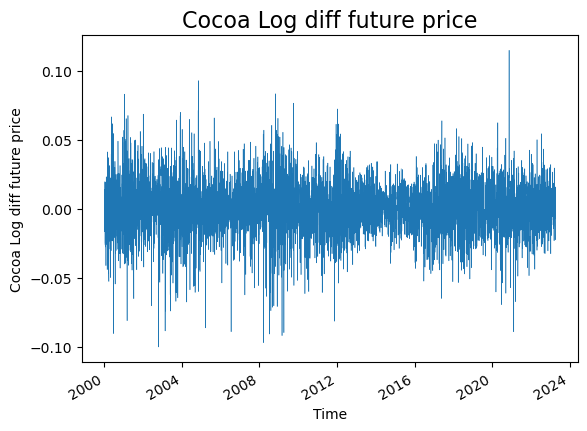

In [10]:
Cocoa_hist_log_diff = Cocoa_hist_log.diff(periods=1)
Cocoa_hist_log_diff.plot(linewidth=0.4)
plt.title('Cocoa Log diff future price', fontsize=16)
plt.xlabel('Time', fontsize=10)
plt.ylabel('Cocoa Log diff future price', fontsize=10)
plt.show()

In [15]:
test_stationarity(Cocoa_hist_log_diff.dropna(inplace=False))

Results of Dickey-Fuller Test:
Test Statistic                  -42.777783
p-value                           0.000000
#Lags Used                        2.000000
Number of Observations Used    5830.000000
Critical Value (1%)              -3.431472
Critical Value (5%)              -2.862036
Critical Value (10%)             -2.567034
dtype: float64


In [16]:
Cocoa_hist_log_diff.head()

Date
2000-01-04 00:00:00-05:00    0.007203
2000-01-05 00:00:00-05:00   -0.005999
2000-01-06 00:00:00-05:00    0.011962
2000-01-07 00:00:00-05:00    0.014168
2000-01-10 00:00:00-05:00   -0.016549
Name: Close, dtype: float64

After removing heterodasticity and trend, the residues show a p-value below 0,05. Therefore, we can reject that the resulting series is not stationary and affirm that the residues **after removing heterodasticity and trend are stationary**.

As a conclusion, the price of the Cocoa futures contract shows heterodasticity and trend, but **there is no seasonality**. We may think that seasonal crops may result in seasonal prices, but this study shows the lach of seasonality on Cocoa futures price.